# **Course Name: INFO7390-Advances-In-Data-Sciences-And-Architecture**

### Submitted by -
* Name - Nikita Gaurihar
* Nuid - 002980962
___________________________________________________________________________
 
## **Assignment 1** - KMeans Clustering a without Machine Learning Libraries in Python


### **Abstract** 
In order to provide a better customer service, Credit card companies tend to offer upgraded packages on their credit card plans. However, first they need more information about their premium customers. Thus, this projects focuses on dividing the customer population into clusters depending upon factors like their 'Credit Limit' and 'Payments' made.


### **Variables information**
* Downloaded this dataset from Kaggle website. The link is - https://www.kaggle.com/venky12347/credit-card-usage-k-means-clustering
* The dataset contains customer data who enrolled for credit card. It conatins information related to the following nine variables - 
1. CUST_ID
2. BALANCE
3. PURCHASES
4. CASH_ADVANCE
5. PURCHASES_FREQUENCY
6. PURCHASES_TRX
7. CREDIT_LIMIT
8. PAYMENTS
9. MINIMUM_PAYMENTS 

---------------------------------------------------------------------------

# A. Importing necessary libraries:

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

# B. Importing dataset:

In [237]:
cluster = pd.read_csv("C:/Course Work/NEU Semester 2/Advanced Data Science/Assignment 01/CreditCardUsage.csv")

##### **1. Displaying dataset**

In [238]:
cluster.head(5)

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,1,40.900749,95.40,0.000000,0.166667,2,1000.0,201.802084,139.509787
1,2,3202.467416,0.00,6442.945483,0.000000,0,7000.0,4103.032597,1072.340217
2,3,2495.148862,773.17,0.000000,1.000000,12,7500.0,622.066742,627.284787
3,4,1666.670542,1499.00,205.788017,0.083333,1,7500.0,0.000000,NaN
4,5,817.714335,16.00,0.000000,0.083333,1,1200.0,678.334763,244.791237


In [239]:
cluster.shape

(8949, 9)

##### **Interpretation:** There are 8949 rows and 9 different attributes in this dataset

In [240]:
cluster.describe()

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8636.000000
mean,4475.000000,1564.647593,1003.316936,978.959616,0.490405,14.711476,4494.449450,1733.336511,864.304943
std,2583.498113,2081.584016,2136.727848,2097.264344,0.401360,24.858552,3638.815725,2895.168146,2372.566350
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163
25%,2238.000000,128.365782,39.800000,0.000000,0.083333,1.000000,1600.000000,383.282850,169.163545
50%,4475.000000,873.680279,361.490000,0.000000,0.500000,7.000000,3000.000000,857.062706,312.452292
75%,6712.000000,2054.372848,1110.170000,1113.868654,0.916667,17.000000,6500.000000,1901.279320,825.496463
max,8949.000000,19043.138560,49039.570000,47137.211760,1.000000,358.000000,30000.000000,50721.483360,76406.207520


In [241]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              8949 non-null   int64  
 1   BALANCE              8949 non-null   float64
 2   PURCHASES            8949 non-null   float64
 3   CASH_ADVANCE         8949 non-null   float64
 4   PURCHASES_FREQUENCY  8949 non-null   float64
 5   PURCHASES_TRX        8949 non-null   int64  
 6   CREDIT_LIMIT         8949 non-null   float64
 7   PAYMENTS             8949 non-null   float64
 8   MINIMUM_PAYMENTS     8636 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 629.4 KB


#### **Interpretation: Information regarding datatype and number of non-zero values in every column is mentioned above**

#### **2. Checking null values in the dataset:**

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

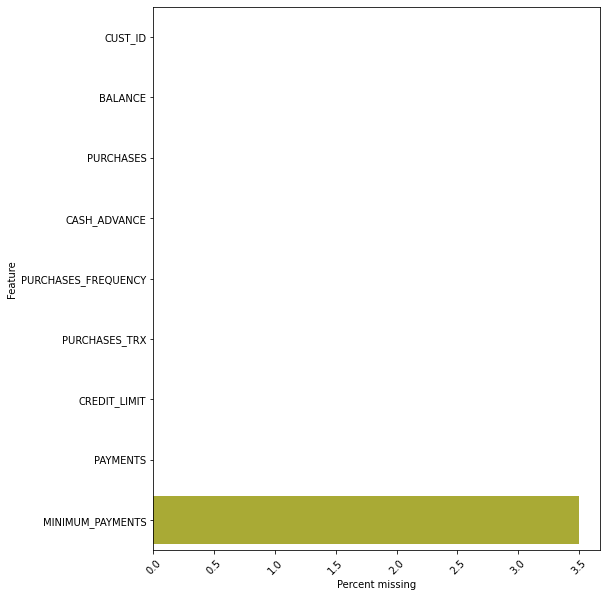

In [242]:
'''Calculate percentage null values for each column or feature'''

null_vals = cluster.isnull().sum()/len(cluster)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")


In [243]:
cluster.isna().sum()

CUST_ID                  0
BALANCE                  0
PURCHASES                0
CASH_ADVANCE             0
PURCHASES_FREQUENCY      0
PURCHASES_TRX            0
CREDIT_LIMIT             0
PAYMENTS                 0
MINIMUM_PAYMENTS       313
dtype: int64

#### **Interpretation: Attibute -'MINIMUM_PAYMENTS' has 313 null values**

In [244]:
cluster.dtypes

CUST_ID                  int64
BALANCE                float64
PURCHASES              float64
CASH_ADVANCE           float64
PURCHASES_FREQUENCY    float64
PURCHASES_TRX            int64
CREDIT_LIMIT           float64
PAYMENTS               float64
MINIMUM_PAYMENTS       float64
dtype: object

### **Interpretation:** 
##### The datatypes of all the attributes in the dataset are mentioned above. 
##### MINIMUM_PAYMENTS has float datatype, so replacing the null values with mean of that column.

In [245]:
cluster[['MINIMUM_PAYMENTS']]

,MINIMUM_PAYMENTS
0,139.509787
1,1072.340217
2,627.284787
3,NaN
4,244.791237
...,...
8944,48.886365
8945,NaN
8946,82.418369
8947,55.755628


In [246]:
cluster[['MINIMUM_PAYMENTS']]=cluster[['MINIMUM_PAYMENTS']].replace(np.nan, cluster[['MINIMUM_PAYMENTS']].mean())

In [247]:
cluster[['MINIMUM_PAYMENTS']]

,MINIMUM_PAYMENTS
0,139.509787
1,1072.340217
2,627.284787
3,864.304943
4,244.791237
...,...
8944,48.886365
8945,864.304943
8946,82.418369
8947,55.755628


In [248]:
for col in cluster.columns:
    print(col, ': ', len(cluster[col].unique()), 'labels')

CUST_ID :  8949 labels
BALANCE :  8870 labels
PURCHASES :  6203 labels
CASH_ADVANCE :  4322 labels
PURCHASES_FREQUENCY :  47 labels
PURCHASES_TRX :  173 labels
CREDIT_LIMIT :  205 labels
PAYMENTS :  8710 labels
MINIMUM_PAYMENTS :  8636 labels


In [249]:
'''Drop duplicated rows'''

cluster2 = cluster.drop_duplicates()
print(cluster2.shape)
cluster2.head(2)

(8949, 9)


,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,1,40.900749,95.4,0.000000,0.166667,2,1000.0,201.802084,139.509787
1,2,3202.467416,0.0,6442.945483,0.000000,0,7000.0,4103.032597,1072.340217


# C. Considering only those columns to consider for k-means clustering

In [250]:
'''Select columns you need'''

df = cluster2 [['CUST_ID','BALANCE','CREDIT_LIMIT','PAYMENTS']]
print(df.shape)
df.head(2)

(8949, 4)


,CUST_ID,BALANCE,CREDIT_LIMIT,PAYMENTS
0,1,40.900749,1000.0,201.802084
1,2,3202.467416,7000.0,4103.032597


In [251]:
df.describe()

,CUST_ID,BALANCE,CREDIT_LIMIT,PAYMENTS
count,8949.000000,8949.000000,8949.000000,8949.000000
mean,4475.000000,1564.647593,4494.449450,1733.336511
std,2583.498113,2081.584016,3638.815725,2895.168146
min,1.000000,0.000000,50.000000,0.000000
25%,2238.000000,128.365782,1600.000000,383.282850
50%,4475.000000,873.680279,3000.000000,857.062706
75%,6712.000000,2054.372848,6500.000000,1901.279320
max,8949.000000,19043.138560,30000.000000,50721.483360


### Checking the skewness of the variables:

C:\Users\nikit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

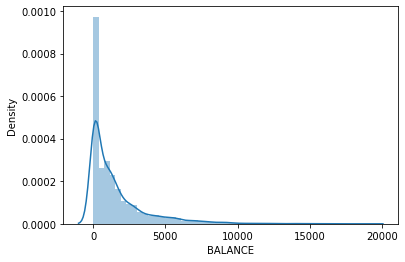

In [252]:
'''Are the data dimensions skewed?'''

sns.distplot(df['BALANCE'])

C:\Users\nikit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

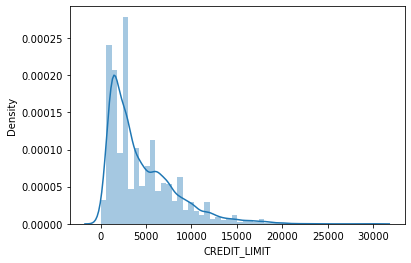

In [253]:
sns.distplot(df['CREDIT_LIMIT'])

C:\Users\nikit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PAYMENTS', ylabel='Density'>

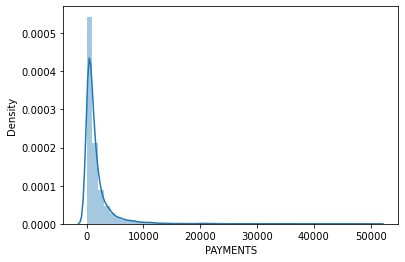

In [254]:
sns.distplot(df['PAYMENTS'])

In [255]:
df.dtypes

CUST_ID           int64
BALANCE         float64
CREDIT_LIMIT    float64
PAYMENTS        float64
dtype: object

##### Interpretation: Looks like the data is skewed. We log transform the data to remove the skew. Further, adding a constant to offset any negative values.

In [256]:
df2 = (np.log(df + 1))
print(df2.shape)
df2.head(10)

(8949, 4)


,CUST_ID,BALANCE,CREDIT_LIMIT,PAYMENTS
0,0.693147,3.735304,6.908755,5.312231
1,1.098612,8.071989,8.853808,8.319725
2,1.386294,7.822504,8.922792,6.434654
3,1.609438,7.419183,8.922792,0.000000
4,1.791759,6.707735,7.090910,6.521114
5,1.945910,7.501540,7.496097,7.244983
6,2.079442,6.442955,9.510519,8.757047
7,2.197225,7.509145,7.741099,6.522189
8,2.302585,6.923556,8.853808,6.535645
9,2.397895,5.031914,9.305741,7.061138


C:\Users\nikit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

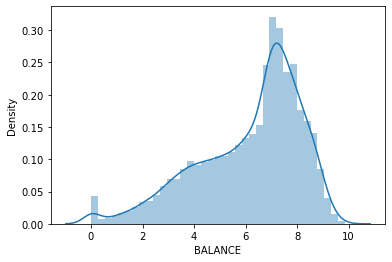

In [257]:
'''Has log transfors made any difference?'''
sns.distplot(df2['BALANCE'])

C:\Users\nikit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

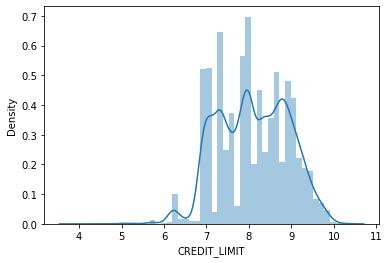

In [258]:
sns.distplot(df2['CREDIT_LIMIT'])

C:\Users\nikit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PAYMENTS', ylabel='Density'>

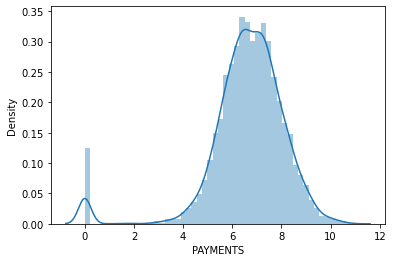

In [259]:
sns.distplot(df2['PAYMENTS'])

## Interpretation:Looks like -
    1. The BALANCE variable has been log transformed from 1-10000 to  1-10.
    2. The CREDIT_LIMIT variable has been log transformed from 0-20000 to  5-10.
    3. The PAYMENTS variable has been log transformed from 1-50000 to  1-12.
    
    

## D. K-Means Clustering Algorithm:

In [260]:
#Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import math as m

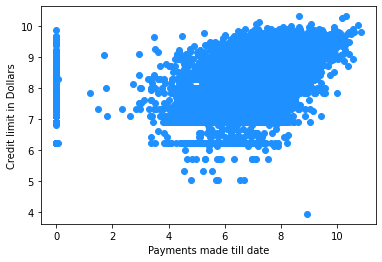

In [273]:
X = df2[["CREDIT_LIMIT","PAYMENTS"]]
#Visualise data points
plt.scatter(X["PAYMENTS"],X["CREDIT_LIMIT"],c='dodgerblue')
plt.xlabel('Payments made till date')
plt.ylabel('Credit limit in Dollars')
plt.show()

## **Interpretation:** Scatterplot for Credit_Limit vs Payments!

In [274]:
def KMeans(K,X):
    # Select random observation as centroids
    Centroids = (X.sample(n=K))
    plt.scatter(X["PAYMENTS"],X["CREDIT_LIMIT"],c='black')
    plt.scatter(Centroids["PAYMENTS"],Centroids["CREDIT_LIMIT"],c='red')
    plt.xlabel('Payments made till date')
    plt.ylabel('Credit limit in Dollars')
    plt.show()
    
    # Step 3 - Assign all the points to the closest cluster centroid
    # Step 4 - Recompute centroids of newly formed clusters
    # Step 5 - Repeat step 3 and 4

    diff = 1
    j=0

    while(diff!=0):
        XD=X
        i=1
        for index1,row_c in Centroids.iterrows():
            ED=[]
            for index2,row_d in XD.iterrows():
                d1=(row_c["PAYMENTS"]-row_d["PAYMENTS"])**2
                d2=(row_c["CREDIT_LIMIT"]-row_d["CREDIT_LIMIT"])**2
                d=np.sqrt(d1+d2)
                ED.append(d)
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():
            min_dist=row[1]
            pos=1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)
        X["Cluster"]=C
        Centroids_new = X.groupby(["Cluster"]).mean()[["CREDIT_LIMIT","PAYMENTS"]]
        if j == 0:
            diff=1
            j=j+1
        else:
            diff = (Centroids_new['CREDIT_LIMIT'] - Centroids['CREDIT_LIMIT']).sum() + (Centroids_new['PAYMENTS'] - Centroids['PAYMENTS']).sum()
            print(diff.sum())
        Centroids = X.groupby(["Cluster"]).mean()[["CREDIT_LIMIT","PAYMENTS"]]

    color=['blue','green','cyan','yellow','pink','darkcyan','brown','purple']
    for k in range(K):
        data=X[X["Cluster"]==k+1]
        plt.scatter(data["PAYMENTS"],data["CREDIT_LIMIT"],c=color[k])
    plt.scatter(Centroids["PAYMENTS"],Centroids["CREDIT_LIMIT"],c='red')
    plt.xlabel('Payments made till date')
    plt.ylabel('Credit limit in Dollars')
    plt.show()

## E. Using this function for different values of K:

### 1. For Clusters = 3,

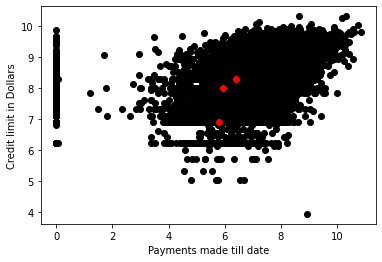

C:\Users\nikit\AppData\Local\Temp/ipykernel_41904/4247246074.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


0.16081028008344855
-0.21442777586522688
-0.7347418465645981
-1.0331032888923057
-1.107783478122597
-0.47196647811911463
-0.19329889704908154
-0.02386630714368171
-0.009500589291651096
-0.0038009332069810498
-0.0038035279335000283
-0.000632181158923828
-0.000640525087245436
0.0


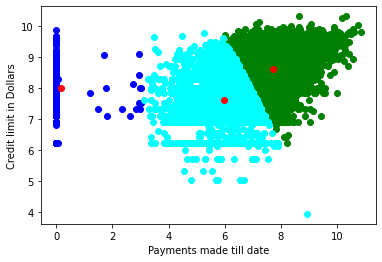

In [275]:
KMeans(3,X)

### 2. For Clusters = 4,

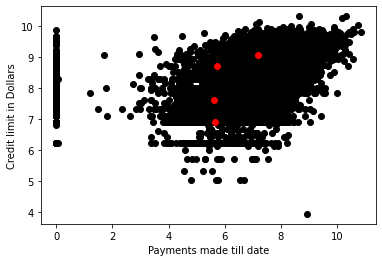

-0.00011700262294134234
-0.06125317804702579
-0.5321546061966114
-0.8685218339928036
-0.9953740069855945
-0.8607812850422704
-0.47755118376768546
-0.12696830943271512
0.027383249536886645
0.041357495572376834
0.06288090439267435
0.0692608178021148
0.07035104087290964
0.07114971679948387
0.09622565465012212
0.06934322345228715
0.03418586010019045
0.04878669531274178
0.037687141703271906
0.018077946949454554
0.002494437605972344
-0.006210223018581651
-0.0036307158924744343
-0.014498633873864186
-0.014325895123324273
-0.010293297240328236
-0.011293753632674708
-0.01483116828190223
-0.01041263918771218
-0.006348890122741757
-0.007881717939736355
-0.00482285368709956
-0.004437091710250307
-0.001254656635937046
-0.0006987796002713154
-0.0006773116259592982
-0.0006894570801216915
-0.0006736783548024761
-0.001335265038973077
-0.0006670547672111837
0.0


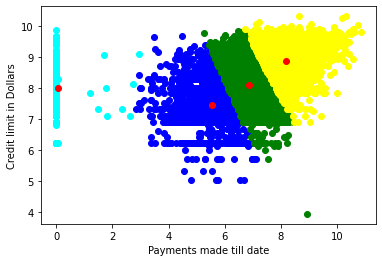

In [276]:
KMeans(4,X)

### 3. For Clusters = 5,

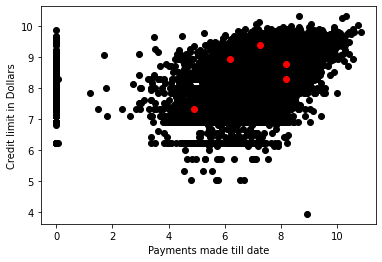

-0.9749797279899983
-1.0019648246295798
-1.099087115854724
-1.3016726987432055
-1.4665282974637683
-0.918082446960756
-0.4078877687121613
-0.2390447099371812
-0.16665371135689314
-0.11771292567694047
-0.1152163122055212
-0.08204167981376109
-0.05544064706402008
-0.04198676845925586
-0.03424069722087175
-0.027847377322363087
-0.023939563850754908
-0.01763912504320686
-0.011338768215940931
-0.004966226374903293
-0.0018891619124241643
-0.0024220988859564585
-0.004937507886627834
-0.0037728771580978204
-0.0018851408753564058
-0.00062947256658763
0.0


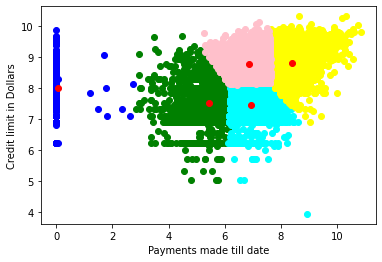

In [277]:
KMeans(5,X)

### 4. For Clusters = 6,

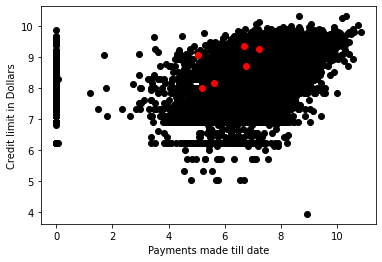

-2.6557615226720723
-0.22933342085777458
0.11094361034380196
0.11120814812157231
0.06411008139829555
0.04488012933497476
0.039171071254322065
0.026029622261995122
0.01744811135587998
0.02069206747417507
0.01108224676999825
0.005218804240714192
0.007739525756386811
0.005150975945380054
0.0030549221915352476
0.002550624999374307
0.0


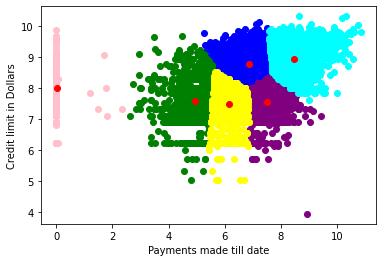

In [270]:
KMeans(6,X)

### 5. For Clusters = 7,

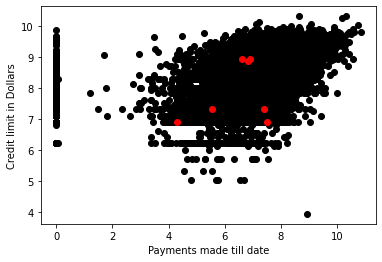

-0.9833291736926848
-0.5989289172544383
-0.18382280506495097
-0.18516778994692706
-0.07228698962889446
-0.10855562950498607
0.023705130154934112
0.05839340278780636
0.03029999310088094
0.0005363791005006391
-0.00808630964124557
-0.007350775468980331
-0.0006310229281956126
-0.013190412666665097
-0.011397957927831825
-0.013712213609701429
-0.0013804795654426272
-0.007956858925910026
0.00010891440317539747
-0.011368168962109237
-0.013217659877462928
-0.025019559903262767
-0.01822366558942523
-0.04593719381543249
-0.05027716501873414
-0.03755328978404204
-0.045402585206460344
-0.06381867326280855
-0.04393021241079431
-0.014466923440807022
-0.016500474240318752
-0.026594729916922688
-0.021367872408672106
-0.016105362061344053
-0.009744632926151908
-0.009064660211431708
-1.9949453605505596e-05
0.0010417284415229489
0.00013853883956294055
-0.0025278699745330258
7.234072480422071e-05
-0.0004903572070737994
0.0011085249652724727
-0.0008264907702013602
-0.0008634626291588177
0.002370179042562092

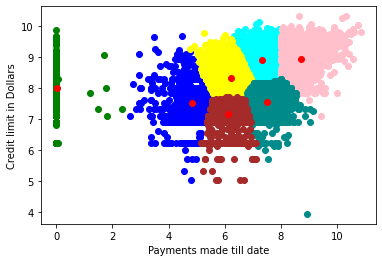

In [278]:
KMeans(7,X)

# E. Plotting graph

#### - ‘epsilon’ which is defined as the sum of squares of euclidean distances between data points and its respective centroid.
#### - We iterate the entire process until there is no significant change in the value of ‘Epsilon’ suggesting there is no significant change in cluster formation.

In [284]:
number_of_iterations = 5
epsilon = list(range(number_of_iterations)) # 'epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration

In [285]:
rows = df2.shape[0]

In [286]:
centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
centroids['new'] = list(range(1,k+1)) 
centroids.set_index('new',inplace = True) # New indices 1 to k are set for the dataframe 'centroids'.
d = np.random.rand(rows) # Initialization of d which would contain the centroid number closest to data point.

In [287]:
for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

    for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
        d[j] = ((centroids - df2.loc[j])**2).sum(axis = 1).idxmin()
    df2['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.


Text(0, 0.5, 'Square root of epsilon')

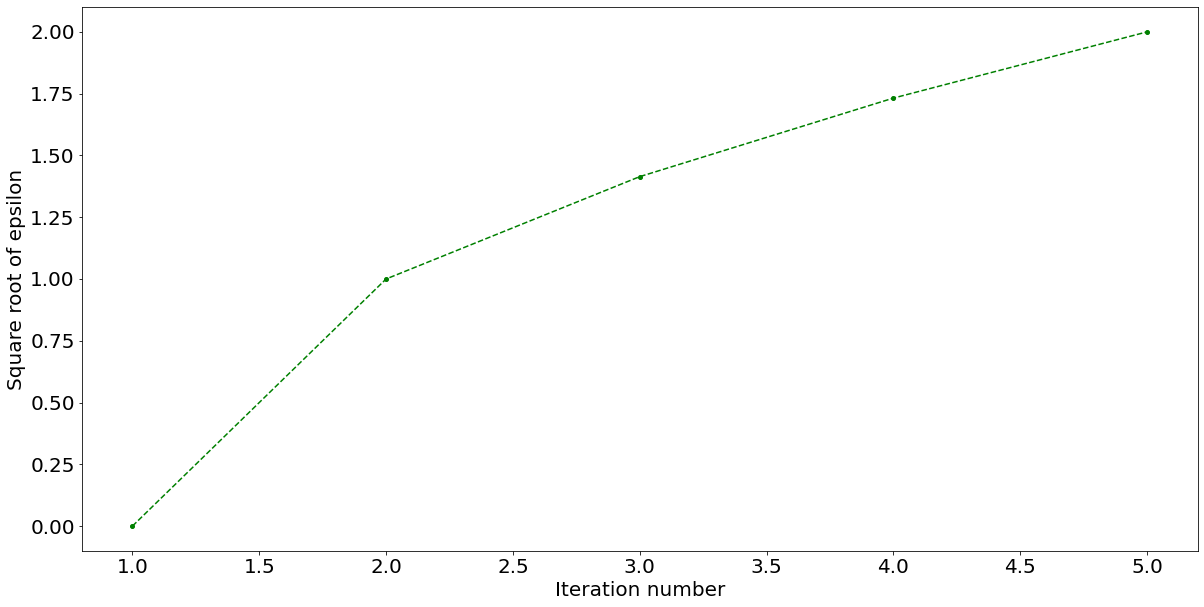

In [288]:
# Plotting graph of 'Iteration number' vs 'Square root of Epsilon'
a = list(range(1,6))
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(a, [x**0.5 for x in epsilon], 'go--', linewidth=1.5, markersize=4)
plt.xlabel('Iteration number',fontsize=20) 
plt.ylabel('Square root of epsilon',fontsize=20) 

## Interpretation:
From the above graph we can see that there is no significant change in the square root of epsilon value after iteration number 3. So thats where we must stop.

# F. Conclusion -
1. KMeans clustering algorithm to form clusters of customers with respect to credit card usage was developed using the CREDIT_LIMT and PAYMENTS variables.
2. Kmeans clustering as a set of funtion was derived without machine learning libraries in python.

References:
* Scikit learn offcial documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Medium Article https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
* https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

### ...........................................................................THANK YOU.......................................................................................
--------------------------------------------------------------------------------------------------------------------------------
